In [14]:
import sys
import os
import yaml

# Set config_path dynamically
project_root =os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
config_path =os.path.join(project_root,"config.yaml")

def load_config():
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"ERROR: config.yaml not found at {config_path}")
    else:
        with open(config_path, "r") as file:
            config = yaml.safe_load(file)
    
    return config

#Test load
config = load_config()
print("Config loaded successfully!")

Config loaded successfully!


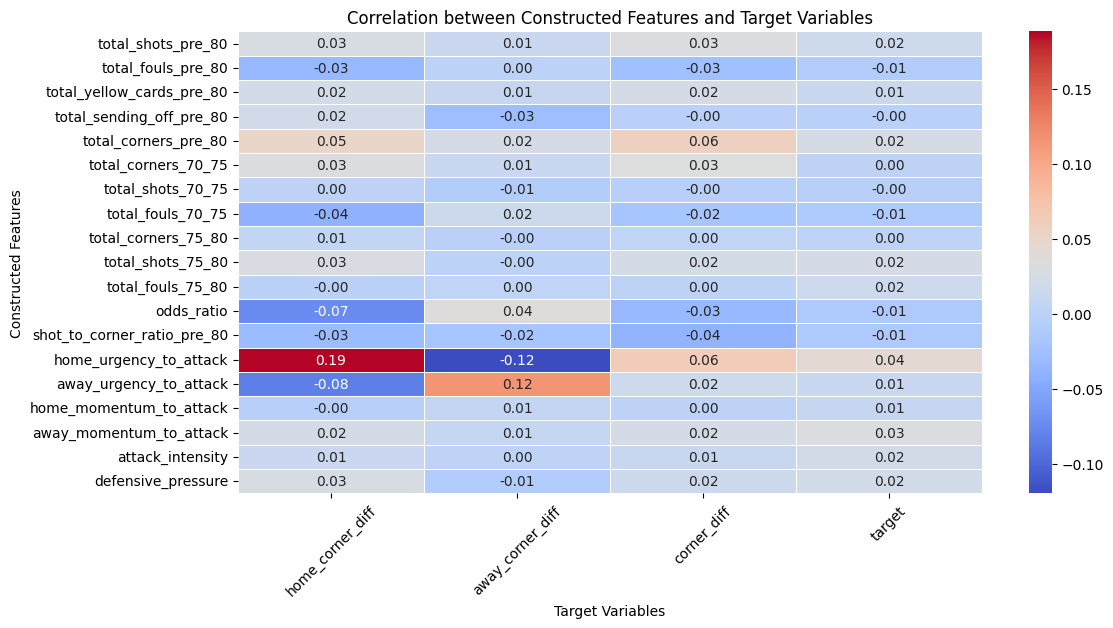

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../df_engineered.csv"
df =pd.read_csv(file_path)

# selected_features = config["features"]["selected_features"]
constructed_features = config["features"]["constructed_features"]
target_variables = config["features"]["target_variables"]

#Corelation matrix:
correlation_matrix = df[constructed_features + target_variables].corr()
correlation_with_target = correlation_matrix[target_variables].drop(target_variables, axis=0) #don't inlcude target_vars

#Plot correlation heatmap:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_with_target,annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Target Variables")
plt.ylabel("Constructed Features")
plt.title("Correlation between Constructed Features and Target Variables")
plt.show()